# tensor 생성하기

In [1]:
import tensorflow as tf
import numpy as np
import os
np.set_printoptions(precision=3)

a = np.array([1, 2, 3], dtype=np.int32)
b = [4, 5, 6]

In [2]:
t_a = tf.convert_to_tensor(a)
t_b = tf.convert_to_tensor(b)

print(t_a)
print(t_b)

tf.Tensor([1 2 3], shape=(3,), dtype=int32)
tf.Tensor([4 5 6], shape=(3,), dtype=int32)


In [3]:
t_ones = tf.ones((2, 3))
t_ones

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>

In [4]:
t_ones.numpy

<bound method _EagerTensorBase.numpy of <tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[1., 1., 1.],
       [1., 1., 1.]], dtype=float32)>>

In [5]:
const_tensor = tf.constant([1.2, 5, np.pi], dtype=tf.float32)
print(const_tensor)

tf.Tensor([1.2   5.    3.142], shape=(3,), dtype=float32)


# tensor들 조작하기

In [6]:
# tf.cast() : 데이터를 원하는 종류로 변경
t_a_new = tf.cast(t_a, tf.int64)
print(t_a_new.dtype)

<dtype: 'int64'>


In [7]:
t = tf.random.uniform(shape=(3, 5))
t_tr = tf.transpose(t) # tensor에 대해 transpose
print(t.shape,'-->', t_tr.shape)

(3, 5) --> (5, 3)


In [8]:
t = tf.zeros((30,))
t_reshape = tf.reshape(t, shape=(5, 6)) # shape 조정
print(t_reshape.shape)

(5, 6)


In [9]:
t = tf.zeros((1, 2, 1, 4, 1))
t_sqz = tf.squeeze(t, axis=(2, 4)) # 불필요한 차원 제거
print(t.shape,'-->',t_sqz.shape)

(1, 2, 1, 4, 1) --> (1, 2, 4)


# tensor들에 대해 수학적 조작

In [10]:
tf.random.set_seed(1)
t1 = tf.random.uniform(shape=(5,2), minval=-1.0, maxval=1.0)
t2 = tf.random.normal(shape=(5, 2), mean=0.0, stddev=1.0)

In [11]:
t3 = tf.multiply(t1, t2).numpy() # 행렬곱과 다르게 같은 위치에 있는 성분들끼리 곱해짐
print(t3)

[[-0.27  -0.874]
 [-0.017 -0.175]
 [-0.296 -0.139]
 [-0.727  0.135]
 [-0.401  0.004]]


In [12]:
t4 = tf.math.reduce_mean(t1, axis=0)
print(t4) # 축의 방향을 따라서 합, 표준편차, 평균등을 구할 수 있음

tf.Tensor([0.09  0.207], shape=(2,), dtype=float32)


In [13]:
t5 = tf.linalg.matmul(t1, t2, transpose_b=True) # tensor들 끼리의 행렬곱 정의. b가 transpose되었으므로 5X5가 나옴
print(t5.numpy())

[[-1.144  1.115 -0.87  -0.321  0.856]
 [ 0.248 -0.191  0.25  -0.064 -0.331]
 [-0.478  0.407 -0.436  0.022  0.527]
 [ 0.525 -0.234  0.741 -0.593 -1.194]
 [-0.099  0.26   0.125 -0.462 -0.396]]


In [14]:
t6 = tf.linalg.matmul(t1, t2, transpose_a=True) # a가 transpose 되었으므로 3X3이 나와야함
print(t6.numpy())

[[-1.711  0.302]
 [ 0.371 -1.049]]


In [15]:
norm_t1 = tf.norm(t1, ord=2, axis=1).numpy() # 차수에 맞는 정규화 진행
print(norm_t1)

[1.046 0.293 0.504 0.96  0.383]


In [16]:
np.sqrt(np.sum(np.square(t1), axis=1))

# 똑같이 나옴

array([1.046, 0.293, 0.504, 0.96 , 0.383], dtype=float32)

# tensor들 split, stack, concentrate

In [17]:
# tensor들 나누기
tf.random.set_seed(1)
t = tf.random.uniform((6,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292 0.643]


In [18]:
t_splits = tf.split(t, num_or_size_splits=3)
[item.numpy() for item in t_splits]
# tensor를 같은 크기로 나누기

[array([0.165, 0.901], dtype=float32),
 array([0.631, 0.435], dtype=float32),
 array([0.292, 0.643], dtype=float32)]

In [19]:
# tensor를 다른 크기로 나누기
tf.random.set_seed(1)
t = tf.random.uniform((5,))
print(t.numpy())

[0.165 0.901 0.631 0.435 0.292]


In [20]:
t_splits = tf.split(t, num_or_size_splits=[3, 2])
[item.numpy() for item in t_splits]

[array([0.165, 0.901, 0.631], dtype=float32),
 array([0.435, 0.292], dtype=float32)]

In [21]:
# tensor들 concat
A = tf.ones((3,))
B = tf.zeros((2,))
C = tf.concat([A, B], axis=0)
print(C.numpy())

[1. 1. 1. 0. 0.]


# tensorflow로 pipeline만들기

In [22]:
a = [1.2, 3.4, 7.5, 4.1, 5.0, 1.0]
ds = tf.data.Dataset.from_tensor_slices(a)
print(ds)

<TensorSliceDataset shapes: (), types: tf.float32>


In [23]:
for item in ds:
    print(item)
    
# 다음과 같이 데이터가 잘게 나누어 진 것을 확인함

tf.Tensor(1.2, shape=(), dtype=float32)
tf.Tensor(3.4, shape=(), dtype=float32)
tf.Tensor(7.5, shape=(), dtype=float32)
tf.Tensor(4.1, shape=(), dtype=float32)
tf.Tensor(5.0, shape=(), dtype=float32)
tf.Tensor(1.0, shape=(), dtype=float32)


In [24]:
ds_batch = ds.batch(3) # 다음과 같이 mini-batch의 크기도 조정가능
for i, elem in enumerate(ds_batch, 1):
    print('batch {}:'.format(i), elem.numpy())

batch 1: [1.2 3.4 7.5]
batch 2: [4.1 5.  1. ]


# tensor들 결합하기

In [25]:
tf.random.set_seed(1)
t_x = tf.random.uniform([4, 3], dtype=tf.float32)
t_y = tf.range(4)

In [26]:
ds_x = tf.data.Dataset.from_tensor_slices(t_x)
ds_y = tf.data.Dataset.from_tensor_slices(t_y)

ds_joint = tf.data.Dataset.zip((ds_x, ds_y))
# 하나의 데이터셋으로 합쳐줄 수 있음
for example in ds_joint:
    print('x:', example[0].numpy(),'y:', example[1].numpy())

x: [0.165 0.901 0.631] y: 0
x: [0.435 0.292 0.643] y: 1
x: [0.976 0.435 0.66 ] y: 2
x: [0.605 0.637 0.614] y: 3


In [27]:
ds_trans = ds_joint.map(lambda x,y: (x*2-1.0, y))
for example in ds_trans:
    print('x:', example[0].numpy(),'y:', example[1].numpy())

x: [-0.67   0.803  0.262] y: 0
x: [-0.131 -0.416  0.285] y: 1
x: [ 0.952 -0.13   0.32 ] y: 2
x: [0.21  0.273 0.229] y: 3


# Shuffle, batch, repeat(중요★)

In [28]:
tf.random.set_seed(1)
ds = ds_joint.shuffle(buffer_size=len(t_x))
for example in ds:
    print('x:', example[0].numpy(), 'y:', example[1].numpy())
    
# 데이터를 섞을때, shuffle()을 활용하고, buffer_size로 몇개씩 섞을건지 설정

x: [0.976 0.435 0.66 ] y: 2
x: [0.435 0.292 0.643] y: 1
x: [0.165 0.901 0.631] y: 0
x: [0.605 0.637 0.614] y: 3


In [29]:
ds = ds_joint.batch(batch_size=3, drop_remainder=False)
batch_x, batch_y = next(iter(ds))
print('Batch-x:\n', batch_x.numpy())

Batch-x:
 [[0.165 0.901 0.631]
 [0.435 0.292 0.643]
 [0.976 0.435 0.66 ]]


In [30]:
print('Batch-y:', batch_y.numpy())

Batch-y: [0 1 2]


In [31]:
ds = ds_joint.batch(3).repeat(count=2) # epochs의 수 만큼 보통 섞어주어야 함
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())
    
# 결과를 보면 count=2만큼 같은 데이터가 여러번 섞이는 것을 볼 수 있다.

0 (3, 3) [0 1 2]
1 (1, 3) [3]
2 (3, 3) [0 1 2]
3 (1, 3) [3]


In [32]:
# shuffle -> batch -> repeat
tf.random.set_seed(1)
ds = ds_joint.shuffle(4).batch(2).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [2 1]
1 (2, 3) [0 3]
2 (2, 3) [0 3]
3 (2, 3) [1 2]
4 (2, 3) [3 0]
5 (2, 3) [1 2]


In [33]:
# batch -> shuffle -> repeat
tf.random.set_seed(1)
ds = ds_joint.batch(2).shuffle(4).repeat(3)
for i, (batch_x, batch_y) in enumerate(ds):
    print(i, batch_x.shape, batch_y.numpy())

0 (2, 3) [0 1]
1 (2, 3) [2 3]
2 (2, 3) [0 1]
3 (2, 3) [2 3]
4 (2, 3) [2 3]
5 (2, 3) [0 1]


# 로컬 저장소로 부터 dataset 만들기

In [34]:
import pathlib
imgdir_path = pathlib.Path('cat_dog_images')
file_list = sorted([str(path) for path in imgdir_path.glob('*.jpg')])
file_list

['cat_dog_images\\cat-01.jpg',
 'cat_dog_images\\cat-02.jpg',
 'cat_dog_images\\cat-03.jpg',
 'cat_dog_images\\dog-01.jpg',
 'cat_dog_images\\dog-02.jpg',
 'cat_dog_images\\dog-03.jpg']

Image shape:  (900, 1200, 3)
Image shape:  (900, 1200, 3)
Image shape:  (900, 742, 3)
Image shape:  (800, 1200, 3)
Image shape:  (800, 1200, 3)
Image shape:  (900, 1200, 3)


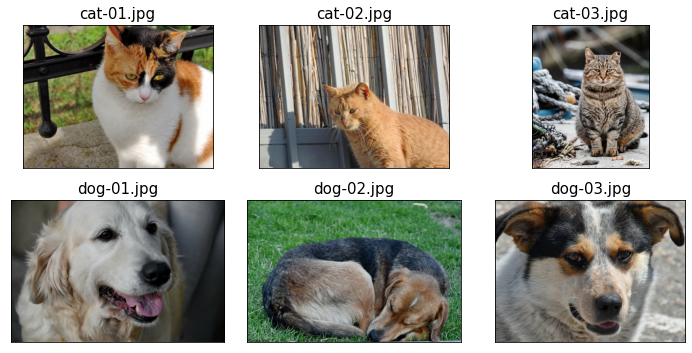

In [35]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10, 5))
for i, file in enumerate(file_list):
    img_raw = tf.io.read_file(file)
    img = tf.image.decode_image(img_raw)
    print('Image shape: ', img.shape)
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(img)
    ax.set_title(os.path.basename(file), size=15)

plt.tight_layout()
plt.show()

In [36]:
labels = [1 if 'dog' in os.path.basename(file) else 0 for file in file_list]
print(labels)

[0, 0, 0, 1, 1, 1]


In [37]:
ds_files_labels = tf.data.Dataset.from_tensor_slices((file_list, labels))
for item in ds_files_labels:
    print(item[0].numpy(), item[1].numpy())

b'cat_dog_images\\cat-01.jpg' 0
b'cat_dog_images\\cat-02.jpg' 0
b'cat_dog_images\\cat-03.jpg' 0
b'cat_dog_images\\dog-01.jpg' 1
b'cat_dog_images\\dog-02.jpg' 1
b'cat_dog_images\\dog-03.jpg' 1


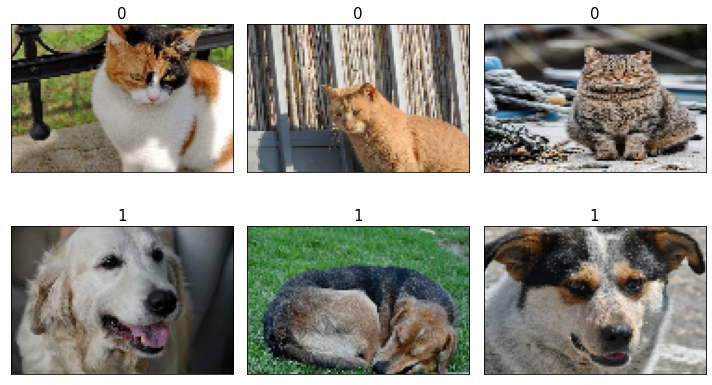

In [38]:
def load_and_preprocess(path, label):
    image = tf.io.read_file(path)
    image = tf.image.decode_jpeg(image, channels=3)
    image = tf.image.resize(image, [img_height, img_width])
    image /= 255.0
    return image, label
# 파이썬 자체 map()을 통해 이미지 데이터에 대해 전처리
img_width, img_height = 120, 80
ds_images_labels = ds_files_labels.map(load_and_preprocess)

fig = plt.figure(figsize=(10, 6))
for i, example in enumerate(ds_images_labels):
    ax = fig.add_subplot(2, 3, i+1)
    ax.set_xticks([]); ax.set_yticks([])
    ax.imshow(example[0])
    ax.set_title('{}'.format(example[1].numpy()), size = 15)

plt.tight_layout()
plt.show()

# tensorflow로 모델 구축 - 선형회귀

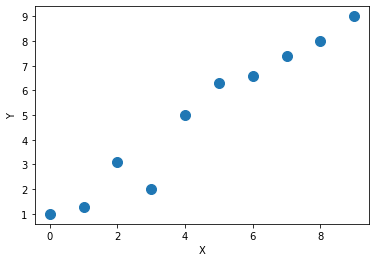

In [39]:
X_train = np.arange(10).reshape((10, 1))
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0, 6.3, 6.6, 7.4, 8.0, 9.0])

plt.plot(X_train, y_train, 'o', markersize = 10)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [40]:
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
ds_train_orig = tf.data.Dataset.from_tensor_slices(
(tf.cast(X_train_norm, tf.float32), tf.cast(y_train, tf.float32)))

In [41]:
class MyModel(tf.keras.Model):
    def __init__(self):
        super(MyModel, self).__init__()
        self.w = tf.Variable(0.0, name = 'weight')
        self.b = tf.Variable(0.0, name = 'bias')
        
    def call(self, x):
        return self.w * x + self.b

In [42]:
model = MyModel()
model.build(input_shape=(None, 1))
model.summary()

Model: "my_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [43]:
def loss_fn(y_true, y_pred):
    return tf.reduce_mean(tf.square(y_true - y_pred))
def train(model, inputs, outputs, learning_rate):
    with tf.GradientTape() as tape:
        current_loss = loss_fn(model(inputs), outputs)
    dw, db = tape.gradient(current_loss, [model.w, model.b])
    model.w.assign_sub(learning_rate*dw)
    model.b.assign_sub(learning_rate*db)

In [44]:
tf.random.set_seed(1)
num_epochs = 200
log_steps = 100
learning_rate = 0.001
batch_size = 1
steps_per_epoch = int(np.ceil(len(y_train) / batch_size))

ds_train = ds_train_orig.shuffle(buffer_size=len(y_train))
ds_train = ds_train.repeat(count=None)
ds_train = ds_train.batch(1)
Ws, bs = [], []

for i, batch in enumerate(ds_train):
    if i >= steps_per_epoch * num_epochs:
        break
    Ws.append(model.w.numpy())
    bs.append(model.b.numpy())
    
    bx, by = batch
    loss_val = loss_fn(model(bx), by)
    
    train(model, bx, by, learning_rate=learning_rate)
    if i % log_steps == 0:
        print('Epoch {:4d} Step {:2d} Loss {:6.4f}'.format(int(i/steps_per_epoch), i, loss_val))

Epoch    0 Step  0 Loss 43.5600
Epoch   10 Step 100 Loss 0.7530
Epoch   20 Step 200 Loss 20.1759
Epoch   30 Step 300 Loss 23.3976
Epoch   40 Step 400 Loss 6.3481
Epoch   50 Step 500 Loss 4.6356
Epoch   60 Step 600 Loss 0.2411
Epoch   70 Step 700 Loss 0.2036
Epoch   80 Step 800 Loss 3.8177
Epoch   90 Step 900 Loss 0.9416
Epoch  100 Step 1000 Loss 0.7035
Epoch  110 Step 1100 Loss 0.0348
Epoch  120 Step 1200 Loss 0.5404
Epoch  130 Step 1300 Loss 0.1170
Epoch  140 Step 1400 Loss 0.1195
Epoch  150 Step 1500 Loss 0.0944
Epoch  160 Step 1600 Loss 0.4670
Epoch  170 Step 1700 Loss 2.0695
Epoch  180 Step 1800 Loss 0.0020
Epoch  190 Step 1900 Loss 0.3612


In [45]:
import tensorflow_datasets as tfds
print(tfds.__version__)

4.4.0


In [46]:
iris, iris_info = tfds.load('iris', with_info=True)
print(iris_info)

tfds.core.DatasetInfo(
    name='iris',
    full_name='iris/2.0.0',
    description="""
    This is perhaps the best known database to be found in the pattern recognition
    literature. Fisher's paper is a classic in the field and is referenced
    frequently to this day. (See Duda & Hart, for example.) The data set contains
    3 classes of 50 instances each, where each class refers to a type of iris
    plant. One class is linearly separable from the other 2; the latter are NOT
    linearly separable from each other.
    """,
    homepage='https://archive.ics.uci.edu/ml/datasets/iris',
    data_path='C:\\Users\\User\\tensorflow_datasets\\iris\\2.0.0',
    download_size=4.44 KiB,
    dataset_size=7.62 KiB,
    features=FeaturesDict({
        'features': Tensor(shape=(4,), dtype=tf.float32),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    supervised_keys=('features', 'label'),
    disable_shuffling=False,
    splits={
        'train': <SplitInfo num_e

In [47]:
tf.random.set_seed(1)
ds_orig = iris['train']
ds_orig = ds_orig.shuffle(150, reshuffle_each_iteration=False)

ds_train_orig = ds_orig.take(100)
ds_test = ds_orig.skip(100)

In [48]:
ds_train_orig = ds_train_orig.map(lambda x: (x['features'], x['label']))

ds_test = ds_test.map(lambda x: (x['features'], x['label']))

In [49]:
iris_model = tf.keras.Sequential([
    tf.keras.layers.Dense(16, activation = 'sigmoid', name='fc1', input_shape = (4,)),
    tf.keras.layers.Dense(3, name = 'fc2', activation='softmax')
])

iris_model.summary()
# 모델의 summary를 출력

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
fc1 (Dense)                  (None, 16)                80        
_________________________________________________________________
fc2 (Dense)                  (None, 3)                 51        
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [50]:
iris_model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [51]:
num_epochs = 100
training_size = 100
batch_size = 2
steps_per_epoch = np.ceil(training_size/batch_size)

ds_train = ds_train_orig.shuffle(buffer_size=training_size)
ds_train = ds_train.repeat()
ds_train = ds_train.batch(batch_size=batch_size)
ds_train = ds_train.prefetch(buffer_size=1000)

In [52]:
history = iris_model.fit(ds_train, epochs=num_epochs, steps_per_epoch=steps_per_epoch)

Epoch 1/100
50/50 [==============================] - 1s 615us/step - loss: 1.4386 - accuracy: 0.3300
Epoch 2/100
50/50 [==============================] - 0s 579us/step - loss: 1.1728 - accuracy: 0.6300
Epoch 3/100
50/50 [==============================] - 0s 651us/step - loss: 1.0255 - accuracy: 0.6100
Epoch 4/100
50/50 [==============================] - 0s 693us/step - loss: 0.9454 - accuracy: 0.4800
Epoch 5/100
50/50 [==============================] - 0s 651us/step - loss: 0.8985 - accuracy: 0.6300
Epoch 6/100
50/50 [==============================] - 0s 614us/step - loss: 0.8488 - accuracy: 0.6600
Epoch 7/100
50/50 [==============================] - 0s 611us/step - loss: 0.8078 - accuracy: 0.7200
Epoch 8/100
50/50 [==============================] - 0s 957us/step - loss: 0.7715 - accuracy: 0.7200
Epoch 9/100
50/50 [==============================] - 0s 835us/step - loss: 0.7394 - accuracy: 0.7200
Epoch 10/100
50/50 [==============================] - 0s 773us/step - loss: 0.7105 - accura

50/50 [==============================] - 0s 602us/step - loss: 0.1908 - accuracy: 0.9800
Epoch 82/100
50/50 [==============================] - 0s 567us/step - loss: 0.1899 - accuracy: 0.9800
Epoch 83/100
50/50 [==============================] - 0s 529us/step - loss: 0.1875 - accuracy: 0.9700
Epoch 84/100
50/50 [==============================] - 0s 610us/step - loss: 0.1840 - accuracy: 0.9700
Epoch 85/100
50/50 [==============================] - 0s 712us/step - loss: 0.1853 - accuracy: 0.9800
Epoch 86/100
50/50 [==============================] - 0s 916us/step - loss: 0.1832 - accuracy: 0.9700
Epoch 87/100
50/50 [==============================] - 0s 855us/step - loss: 0.1756 - accuracy: 0.9800
Epoch 88/100
50/50 [==============================] - 0s 570us/step - loss: 0.1738 - accuracy: 0.9800
Epoch 89/100
50/50 [==============================] - 0s 532us/step - loss: 0.1722 - accuracy: 0.9800
Epoch 90/100
50/50 [==============================] - 0s 507us/step - loss: 0.1694 - accuracy: 

In [53]:
hist = history.history
hist
# Epochs당 loss 와 정확도를 리턴 받음

{'loss': [1.4385998249053955,
  1.1728342771530151,
  1.0255491733551025,
  0.9454357028007507,
  0.898490846157074,
  0.848781406879425,
  0.80776047706604,
  0.7714598178863525,
  0.7393923401832581,
  0.710497260093689,
  0.6830681562423706,
  0.6595677733421326,
  0.6389333605766296,
  0.6172146201133728,
  0.5968244671821594,
  0.5815017819404602,
  0.5634598135948181,
  0.5507410168647766,
  0.5379948616027832,
  0.5239158272743225,
  0.5144336223602295,
  0.5022321939468384,
  0.4909907579421997,
  0.48060593008995056,
  0.472017377614975,
  0.4647337794303894,
  0.4568876326084137,
  0.44659507274627686,
  0.4395263195037842,
  0.42910659313201904,
  0.4235575497150421,
  0.4130985736846924,
  0.4076344966888428,
  0.3994655907154083,
  0.39550700783729553,
  0.38613998889923096,
  0.3796146512031555,
  0.37357574701309204,
  0.36614134907722473,
  0.3656258285045624,
  0.3557533621788025,
  0.34781384468078613,
  0.34326422214508057,
  0.33682769536972046,
  0.3330054581165313

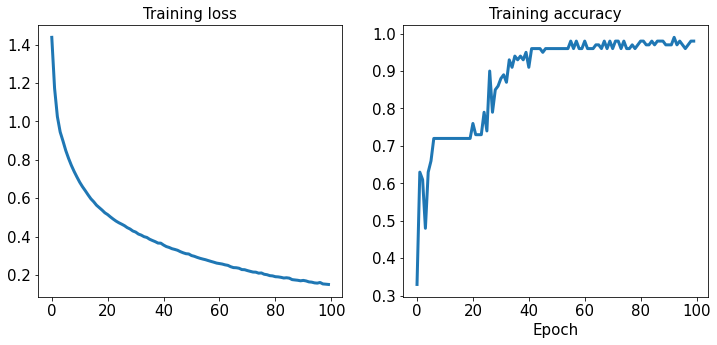

In [54]:
fig = plt.figure(figsize=(12, 5))
ax = fig.add_subplot(1, 2, 1)
ax.plot(hist['loss'], lw = 3)
ax.set_title('Training loss', size = 15)
ax.tick_params(axis='both', which='major', labelsize = 15)
ax = fig.add_subplot(1, 2, 2)
ax.plot(hist['accuracy'], lw = 3)
ax.set_title('Training accuracy', size = 15)
ax.set_xlabel('Epoch', size = 15)
ax.tick_params(axis='both', which = 'major', labelsize = 15)
plt.show()

In [55]:
results = iris_model.evaluate(ds_test.batch(50))
print('Test loss :{: .4f}   Test acc: {:.4f}'.format(*results))

1/1 [==============================] - 0s 130ms/step - loss: 0.1483 - accuracy: 0.9800
Test loss : 0.1483   Test acc: 0.9800


# 모델 저장하고 불러오기

In [56]:
iris_model.save('iris-classifier.h5', overwrite=True, include_optimizer=True, save_format='h5')

In [57]:
iris_model_new = tf.keras.models.load_model('iris-classifier.h5')

In [58]:
results = iris_model_new.evaluate(ds_test.batch(33))
print('Test loss:{:.4f}  Test acc:{:.4f}'.format(*results))

# 앞 결과와 동일하다67

2/2 [==============================] - 0s 2ms/step - loss: 0.1483 - accuracy: 0.9800
Test loss:0.1483  Test acc:0.9800


# 로지스틱 함수의 개요

In [59]:
import numpy as np
X = np.array([1, 1.4, 2.5])
w = np.array([0.4, 0.3, 0.5])

def net_input(X, w):
    return np.dot(X, w)

def logistic(z):
    return 1.0/(1.0 + np.exp(-z))

def logistic_activation(X, w):
    z = net_input(X, w)
    return logistic(z)

print('P(y=1|x) = %.3f' % logistic_activation(X, w))

P(y=1|x) = 0.888


In [60]:
W = np.array([[1.1, 1.2, 0.8, 0.4],
             [0.2, 0.4, 1.0, 0.2],
             [0.6, 1.5, 1.2, 0.7]])

A = np.array([[1, 0.1, 0.4, 0.6]])

Z = np.dot(W, A[0])
y_probas = logistic(Z)
print('Net input: \n', Z)

Net input: 
 [1.78 0.76 1.65]


In [61]:
print('Output Units:\n', y_probas)
# 확률론상 1이 나와야 하는데, 1이 안나온다.
# 따라서 소프트맥스 라는 함수가 도입됨

Output Units:
 [0.856 0.681 0.839]


In [62]:
y_class = np.argmax(Z, axis=0)
print('Predicted class label: %d' % y_class)

Predicted class label: 0


# 각종 활성화함수

In [63]:
def softmax(z):
    return np.exp(z) / np.sum(np.exp(z))

y_probas = softmax(Z)
print('Probabilities:\n', y_probas)

Probabilities:
 [0.447 0.161 0.392]


In [64]:
np.sum(y_probas)

1.0

In [65]:
Z_tensor = tf.expand_dims(Z, axis=0)
tf.keras.activations.softmax(Z_tensor)

<tf.Tensor: shape=(1, 3), dtype=float64, numpy=array([[0.447, 0.161, 0.392]])>

In [66]:
def tanh(z):
    e_p = np.exp(z)
    e_m = np.exp(-z)
    return (e_p - e_m) / (e_p + e_m)

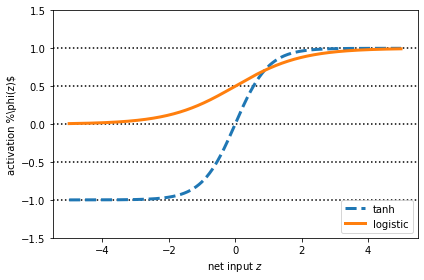

In [67]:
z = np.arange(-5, 5, 0.005)
log_act = logistic(z)
tanh_act = tanh(z)
plt.ylim([-1.5, 1.5])
plt.xlabel('net input $z$')
plt.ylabel('activation %\phi(z)$')
plt.axhline(1, color = 'black', linestyle = ':')
plt.axhline(0.5, color = 'black', linestyle = ':')
plt.axhline(0, color='black', linestyle = ':')
plt.axhline(-0.5, color = 'black', linestyle = ':')
plt.axhline(-1, color = 'black', linestyle = ':')

plt.plot(z, tanh_act, linewidth = 3, linestyle = '--', label = 'tanh')
plt.plot(z, log_act, linewidth = 3, label = 'logistic')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [68]:
# numpy 나 tensorflow에서 바로 사용 가능
np.tanh(z)

array([-1., -1., -1., ...,  1.,  1.,  1.])

In [69]:
tf.keras.activations.tanh(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([-1., -1., -1., ...,  1.,  1.,  1.])>

In [70]:
# tensorflow에서 시그모이드 표현
tf.keras.activations.sigmoid(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])>

In [71]:
# scipy에서 sigmoid 포현
from scipy.special import expit
expit(z)

array([0.007, 0.007, 0.007, ..., 0.993, 0.993, 0.993])

In [72]:
# Relu
tf.keras.activations.relu(z)

<tf.Tensor: shape=(2000,), dtype=float64, numpy=array([0.   , 0.   , 0.   , ..., 4.985, 4.99 , 4.995])>